In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pd.set_option("display.precision", 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/dataset/madison/'

## Load dataset

In [ ]:
objects = pd.read_csv(path + '/input/objects_embeddings.csv', usecols=['objectid', 'geometry', 'source', 'geom_type', 'n_tokens'])
objects.head()

,objectid,geometry,source,geom_type,n_tokens
0,"road_(6231530142, 3861040918)","LINESTRING (-89.4719 43.05, -89.472 43.05)",link,LineString,21
1,"road_(53591318, 1179412798)","LINESTRING (-89.477 43.0693, -89.477 43.0681)",link,LineString,22
2,"road_(1178722373, 1178722211)","LINESTRING (-89.4626 43.0553, -89.4627 43.0554)",link,LineString,24
3,"road_(53430628, 53468282)","LINESTRING (-89.3045 43.0246, -89.3053 43.0252)",link,LineString,24
4,"road_(3444117858, 6680557104)","LINESTRING (-89.5081 43.0066, -89.5072 43.006)",link,LineString,23


In [ ]:

relations = pd.read_csv(path+'input/relations.csv', usecols=['subjectid', 'objectid', 'predicate', 'relate', 'idx'])
# relations.to_csv('/content/drive/MyDrive/dataset/madison/output/relations_update.csv', index=False)
# relations = pd.read_csv('/content/drive/MyDrive/dataset/madison/output/relations_update.csv')
relations.head()

,objectid,subjectid,predicate,relate,idx
0,"road_(53496379, 5657142535)","road_(5656899646, 53496379)",contains,101F00FF2,0
1,"road_(2634716954, 8997363243)","road_(8997363242, 2634716954)",contains,101F00FF2,1
2,poi_way/1134399612,poi_way/1134399613,contains,1F1FFFFF2,2
3,"road_(1998162788, 1998162839)",poi_way/257174438,contains,101FFFFF2,3
4,"road_(3420767254, 3590603510)",poi_way/287637061,contains,101FFFFF2,4


In [ ]:
relations = pd.merge(relations, objects[['objectid', 'geometry', 'source', 'geom_type','n_tokens']].rename(columns={'objectid': 'subjectid',
                                                        'geometry': 'geometry_subject',
                                                        'source': 'source_subject',
                                                        'geom_type': 'geom_type_subject',
                                                          'n_tokens': 'n_tokens_subject'
                                                        }), on='subjectid', how='inner')
relations = pd.merge(relations, objects[['objectid', 'geometry', 'source', 'geom_type', 'n_tokens']], on='objectid', how='inner')
relations.head()

,objectid,subjectid,predicate,relate,idx,geometry_subject,source_subject,geom_type_subject,n_tokens_subject,geometry,source,geom_type,n_tokens
0,"road_(53496379, 5657142535)","road_(5656899646, 53496379)",contains,101F00FF2,0,"LINESTRING (-89.3397 43.0922, -89.3386 43.0922)",link,LineString,24,"LINESTRING (-89.3386 43.0922, -89.3387 43.0922)",link,LineString,24
1,"road_(2634716954, 8997363243)","road_(8997363242, 2634716954)",contains,101F00FF2,1,"LINESTRING (-89.3554 43.1351, -89.3554 43.1357)",link,LineString,24,"LINESTRING (-89.3554 43.1357, -89.3554 43.1355)",link,LineString,24
2,poi_way/1134399612,poi_way/1134399613,contains,1F1FFFFF2,2,"LINESTRING (-89.4524 43.0716, -89.4521 43.0716...",poi,LineString,57,"LINESTRING (-89.4524 43.0715, -89.4521 43.0715...",poi,LineString,46
3,"road_(1998162788, 1998162839)",poi_way/257174438,contains,101FFFFF2,3,"LINESTRING (-89.3392 43.0637, -89.3399 43.0641...",poi,LineString,134,"LINESTRING (-89.338 43.0659, -89.3378 43.0659)",link,LineString,23
4,"road_(3420767254, 3590603510)",poi_way/287637061,contains,101FFFFF2,4,"LINESTRING (-89.5168 43.0606, -89.5168 43.0616...",poi,LineString,57,"LINESTRING (-89.5175 43.0611, -89.5175 43.0607)",link,LineString,24


In [ ]:
relations[(relations['geom_type_subject']=='Point')&(relations['geom_type']=='LineString')].sort_values(by=['n_tokens_subject', 'n_tokens']).iloc[0]

,3345
objectid,"road_(2633805462, 3423901632)"
subjectid,node_3752320724
predicate,disjoint
relate,FF0FFF102
idx,195
geometry_subject,POINT (-89.456 43.061)
source_subject,intersection
geom_type_subject,Point
n_tokens_subject,10
geometry,"LINESTRING (-89.459 43.0661, -89.459 43.066)"


In [ ]:
relate_df = relations[['geom_type_subject', 'predicate', 'geom_type']].drop_duplicates().reset_index(drop=True)
relate_df['rid'] = relate_df.index
relate_df['output'] = '(' + relate_df['geom_type_subject'] + ',' + relate_df['predicate'] + ',' + relate_df['geom_type'] + ')'
relations = pd.merge(relations, relate_df, on=['geom_type_subject', 'predicate', 'geom_type'], how='left')
# relations = pd.merge(relations, relate_df, on=['geom_type_subject', 'predicate', 'geom_type'], how='left')

In [ ]:
relations_example = relations[relations['idx']>=200].reset_index(drop=True)

relations_test = relations[relations['idx']<40].reset_index(drop=True)

relations_train = relations[(relations['idx']>=40)&(relations['idx']<200)].reset_index(drop=True)

## Load result

In [ ]:
res_ada= pd.read_csv(path+'/result/task1/task1_ada.csv')
res_ada = res_ada.rename(columns={'rid_ada': 'pred', 'output': 'label', 'output_ada': 'output', })
res_ada[['geom_type_subject_pred', 'predicate_pred', 'geom_type_pred']] = res_ada['output'].str.split(',', expand=True)
res_ada['geom_type_subject_pred'] = res_ada['geom_type_subject_pred'].str[1:]
res_ada['geom_type_pred'] = res_ada['geom_type_pred'].str[:-1]
res_ada[['geom_type_subject', 'predicate', 'geom_type']] = res_ada['label'].str.split(',', expand=True)
res_ada['geom_type_subject'] = res_ada['geom_type_subject'].str[1:]
res_ada['geom_type'] = res_ada['geom_type'].str[:-1]
res_ada['text'] = res_ada['output']
res_ada['model'] = 'ada'
res_ada['prompt_mode']='none'

res_ada.head()

,subjectid,objectid,rid,pred,label,output,geom_type_subject_pred,predicate_pred,geom_type_pred,geom_type_subject,predicate,geom_type,text,model,prompt_mode
0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",0,0,"(LineString,contains,LineString)","(LineString,contains,LineString)",LineString,contains,LineString,LineString,contains,LineString,"(LineString,contains,LineString)",ada,none
1,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",0,9,"(LineString,contains,LineString)","(LineString,touches,LineString)",LineString,touches,LineString,LineString,contains,LineString,"(LineString,touches,LineString)",ada,none
2,poi_way/1134399613,poi_way/1134399612,0,8,"(LineString,contains,LineString)","(LineString,overlaps,LineString)",LineString,overlaps,LineString,LineString,contains,LineString,"(LineString,overlaps,LineString)",ada,none
3,poi_way/257174438,"road_(1998162788, 1998162839)",0,8,"(LineString,contains,LineString)","(LineString,overlaps,LineString)",LineString,overlaps,LineString,LineString,contains,LineString,"(LineString,overlaps,LineString)",ada,none
4,poi_way/287637061,"road_(3420767254, 3590603510)",0,0,"(LineString,contains,LineString)","(LineString,contains,LineString)",LineString,contains,LineString,LineString,contains,LineString,"(LineString,contains,LineString)",ada,none


In [ ]:
res_large= pd.read_csv(path+'/result/task1/task1_large.csv')
res_large = res_large.rename(columns={'rid_large': 'pred', 'output': 'label', 'output_large': 'output', })
res_large[['geom_type_subject_pred', 'predicate_pred', 'geom_type_pred']] = res_large['output'].str.split(',', expand=True)
res_large['geom_type_subject_pred'] = res_large['geom_type_subject_pred'].str[1:]
res_large['geom_type_pred'] = res_large['geom_type_pred'].str[:-1]
res_large[['geom_type_subject', 'predicate', 'geom_type']] = res_large['label'].str.split(',', expand=True)
res_large['geom_type_subject'] = res_large['geom_type_subject'].str[1:]
res_large['geom_type'] = res_large['geom_type'].str[:-1]
res_large['text'] = res_large['output']
res_large['model'] = 'large'
res_large['prompt_mode']='none'

res_large.head()

,subjectid,objectid,rid,pred,label,output,geom_type_subject_pred,predicate_pred,geom_type_pred,geom_type_subject,predicate,geom_type,text,model,prompt_mode
0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",0,0,"(LineString,contains,LineString)","(LineString,contains,LineString)",LineString,contains,LineString,LineString,contains,LineString,"(LineString,contains,LineString)",large,none
1,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",0,0,"(LineString,contains,LineString)","(LineString,contains,LineString)",LineString,contains,LineString,LineString,contains,LineString,"(LineString,contains,LineString)",large,none
2,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",0,28,"(LineString,contains,LineString)","(LineString,within,LineString)",LineString,within,LineString,LineString,contains,LineString,"(LineString,within,LineString)",large,none
3,poi_way/1134399613,poi_way/1134399612,0,14,"(LineString,contains,LineString)","(LineString,overlaps,LineString)",LineString,overlaps,LineString,LineString,contains,LineString,"(LineString,overlaps,LineString)",large,none
4,parcel_70920121012,poi_way/1134399612,1,1,"(Polygon,contains,LineString)","(Polygon,contains,LineString)",Polygon,contains,LineString,Polygon,contains,LineString,"(Polygon,contains,LineString)",large,none


In [ ]:
setting_list = [{'model': 'ada', 'prompt_mode': 'none', 'id': 0},
                {'model': 'large', 'prompt_mode': 'none', 'id': 1}]
k = 2

In [ ]:
comb_list = []
for geom_type_subject in ['Point', 'LineString', 'Polygon']:
    for predicate in relate_df['predicate'].unique().tolist():
      for geom_type in ['Point', 'LineString', 'Polygon']:
        comb_list.append(str((geom_type_subject, predicate, geom_type)).replace('\'', '').replace(' ', ''))
len(comb_list)

63

In [ ]:
comb_list

['(Point,contains,Point)',
 '(Point,contains,LineString)',
 '(Point,contains,Polygon)',
 '(Point,crosses,Point)',
 '(Point,crosses,LineString)',
 '(Point,crosses,Polygon)',
 '(Point,disjoint,Point)',
 '(Point,disjoint,LineString)',
 '(Point,disjoint,Polygon)',
 '(Point,equals,Point)',
 '(Point,equals,LineString)',
 '(Point,equals,Polygon)',
 '(Point,overlaps,Point)',
 '(Point,overlaps,LineString)',
 '(Point,overlaps,Polygon)',
 '(Point,touches,Point)',
 '(Point,touches,LineString)',
 '(Point,touches,Polygon)',
 '(Point,within,Point)',
 '(Point,within,LineString)',
 '(Point,within,Polygon)',
 '(LineString,contains,Point)',
 '(LineString,contains,LineString)',
 '(LineString,contains,Polygon)',
 '(LineString,crosses,Point)',
 '(LineString,crosses,LineString)',
 '(LineString,crosses,Polygon)',
 '(LineString,disjoint,Point)',
 '(LineString,disjoint,LineString)',
 '(LineString,disjoint,Polygon)',
 '(LineString,equals,Point)',
 '(LineString,equals,LineString)',
 '(LineString,equals,Polygon)',

In [ ]:

def load_result(prompt_mode, model):
      # res = relations_test[['subjectid', 'objectid', 'predicate', 'rid', 'output']].rename(columns={'output': 'label'}).copy()
      # # res['prompt_mode'] = prompt_mode
      # # res['model'] = model
      # res_llm = pd.read_csv(path+'result/temp/task1_%s_%s.csv'%(model, prompt_mode)).drop_duplicates(subset='idx', keep='last')
      # if res_llm.shape[0]==res.shape[0]:
      #     if 'text' not in res_llm.columns:
      #         res['text'] = res_llm['output'].values
      #     else:
      #         res['text'] = res_llm['text'].values
      #     res['output'] = res_llm['output'].values
      #     res['output'] = res['output'].str.lower()
      #     res['output'] = res['output'].str.replace(' ', '')
      #     res['output'] = res['output'].str.replace('polygon', 'Polygon')
      #     res['output'] = res['output'].str.replace('linestring', 'LineString')
      #     res['output'] = res['output'].str.replace('point', 'Point')




      #     # res.to_csv(path+'result/task1/task1_%s_%s.csv'%(prompt_mode, model_abbr), index=False)
      #     res[res['rid']==-1]

      # else:
      # print(prompt_mode, model)
      res = pd.read_csv(path+'result/task1/task1_%s_%s.csv'%(prompt_mode, model))
      # print(res.columns)
      res = res.rename(columns={'output': 'label',
                                'text_%s_%s'%(prompt_mode, model): 'text',
                                'output_%s_%s'%(prompt_mode, model): 'output',
                                'rid_%s_%s'%(prompt_mode, model): 'pred',
                                }).drop(columns=['rid', 'pred'])
      res['output'] = res['output'].str.replace(' ', '')
      res['output'] = res['output'].str.replace('polygon', 'Polygon')
      res['output'] = res['output'].str.replace('linestring', 'LineString')
      res['output'] = res['output'].str.replace('point', 'Point')
      res['prompt_mode'] = prompt_mode
      res['model'] = model

      # res = res.drop(columns=['rid', 'pred'])

      res.loc[~(res['output'].isin(set(comb_list))), 'output'] = '(na, na, na)'
      # res.loc[~((res['output'].str[0]=='(')&(res['output'].str[-1]==')')), 'output'] = '(na, na, na)'
      # try:
      res[['geom_type_subject_pred', 'predicate_pred', 'geom_type_pred']] = res['output'].str.split(',', expand=True).iloc[:, :3]
      res['geom_type_subject_pred'] = res['geom_type_subject_pred'].str[1:]
      res['geom_type_pred'] = res['geom_type_pred'].str[:-1]

      res = pd.merge(res, relate_df[['rid', 'output']].rename(columns={ 'output': 'label'}),
                    on='label', how='left')
      res = pd.merge(res, relate_df[['rid', 'output']].rename(columns={ 'rid': 'pred'}),
                    on='output', how='left')
      res.loc[pd.isnull(res['pred']), 'pred'] = -1
      res['pred'] = res['pred'].astype(np.int32)
      # res.loc[~(res['geom_type_subject_pred'].isin(list(relate_df['geom_type_subject']))), 'output'] = '(na, na, na)'
      # res.loc[~(res['geom_type_pred'].isin(list(relate_df['geom_type']))), 'output'] = '(na, na, na)'
      # res.loc[~(res['predicate_pred'].isin(list(relate_df['predicate']))), 'output'] = '(na, na, na)'
      # res[['geom_type_subject_pred', 'predicate_pred', 'geom_type_pred']] = res['output'].str.split(',', expand=True).iloc[:, :3]
      # res['geom_type_subject_pred'] = res['geom_type_subject_pred'].str[1:]
      # res['geom_type_pred'] = res['geom_type_pred'].str[:-1]

      res[['geom_type_subject', 'predicate', 'geom_type']] = res['label'].str.split(',', expand=True)
      res['geom_type_subject'] = res['geom_type_subject'].str[1:]
      res['geom_type'] = res['geom_type'].str[:-1]
      # except:
      #   print(res['output'].str.split(',', expand=True))

      return res

In [ ]:
i = 0
for model in ['gpt3_5', 'gpt4']:
  for prompt_mode in ['zero_shot', 'zero_shot_dim', 'few_shot', 'zero_shot_cot', 'few_shot_cot']:

        setting_list.append({'model': model, 'prompt_mode': prompt_mode, 'id': k})
        k += 1
        print(prompt_mode, model)
        res = load_result(prompt_mode, model)
        print(res.shape)
        if i==0:
            res_all = res.copy()
            i += 1
        else:
            res_all = pd.concat([res_all, res], axis=0)

res_all.head()

zero_shot gpt3_5
(1400, 15)
zero_shot_dim gpt3_5
(1400, 15)
few_shot gpt3_5
(1400, 15)
zero_shot_cot gpt3_5
(1400, 15)
few_shot_cot gpt3_5
(1400, 15)
zero_shot gpt4
(1400, 15)
zero_shot_dim gpt4
(1400, 15)
few_shot gpt4
(1400, 15)
zero_shot_cot gpt4
(1400, 15)
few_shot_cot gpt4
(1400, 15)


,subjectid,objectid,predicate,label,text,output,prompt_mode,model,geom_type_subject_pred,predicate_pred,geom_type_pred,rid,pred,geom_type_subject,geom_type
0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,"(LineString,contains,LineString)","(LineString, crosses, LineString)","(LineString,crosses,LineString)",zero_shot,gpt3_5,LineString,crosses,LineString,0,2,LineString,LineString
1,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,"(LineString,contains,LineString)","(LineString, equals, LineString)","(LineString,equals,LineString)",zero_shot,gpt3_5,LineString,equals,LineString,0,7,LineString,LineString
2,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,"(LineString,contains,LineString)","(LineString, crosses, LineString)","(LineString,crosses,LineString)",zero_shot,gpt3_5,LineString,crosses,LineString,0,2,LineString,LineString
3,poi_way/1134399613,poi_way/1134399612,contains,"(LineString,contains,LineString)","(LineString, crosses, LineString)","(LineString,crosses,LineString)",zero_shot,gpt3_5,LineString,crosses,LineString,0,2,LineString,LineString
4,parcel_70920121012,poi_way/1134399612,contains,"(Polygon,contains,LineString)","(Polygon, crosses, LineString)","(Polygon,crosses,LineString)",zero_shot,gpt3_5,Polygon,crosses,LineString,22,25,Polygon,LineString


In [ ]:
setting_df = pd.DataFrame(setting_list)
setting_df

,model,prompt_mode,id
0,ada,none,0
1,large,none,1
2,gpt3_5,zero_shot,2
3,gpt3_5,zero_shot_dim,3
4,gpt3_5,few_shot,4
5,gpt3_5,zero_shot_cot,5
6,gpt3_5,few_shot_cot,6
7,gpt4,zero_shot,7
8,gpt4,zero_shot_dim,8
9,gpt4,few_shot,9


In [ ]:
res_all = pd.concat([res_all, res_ada, res_large], axis=0)
res_all.head()

,subjectid,objectid,predicate,label,text,output,prompt_mode,model,geom_type_subject_pred,predicate_pred,geom_type_pred,rid,pred,geom_type_subject,geom_type
0,"road_(5656899646, 53496379)","road_(53496379, 5657142535)",contains,"(LineString,contains,LineString)","(LineString, crosses, LineString)","(LineString,crosses,LineString)",zero_shot,gpt3_5,LineString,crosses,LineString,0,2,LineString,LineString
1,"road_(53496379, 5656899646)","road_(53496379, 5657142535)",contains,"(LineString,contains,LineString)","(LineString, equals, LineString)","(LineString,equals,LineString)",zero_shot,gpt3_5,LineString,equals,LineString,0,7,LineString,LineString
2,"road_(8997363242, 2634716954)","road_(2634716954, 8997363243)",contains,"(LineString,contains,LineString)","(LineString, crosses, LineString)","(LineString,crosses,LineString)",zero_shot,gpt3_5,LineString,crosses,LineString,0,2,LineString,LineString
3,poi_way/1134399613,poi_way/1134399612,contains,"(LineString,contains,LineString)","(LineString, crosses, LineString)","(LineString,crosses,LineString)",zero_shot,gpt3_5,LineString,crosses,LineString,0,2,LineString,LineString
4,parcel_70920121012,poi_way/1134399612,contains,"(Polygon,contains,LineString)","(Polygon, crosses, LineString)","(Polygon,crosses,LineString)",zero_shot,gpt3_5,Polygon,crosses,LineString,22,25,Polygon,LineString


In [ ]:
res_all.to_csv(path+'/result/task1/task1_results_all.csv', index=False)

In [ ]:
res_all = pd.read_csv(path+'/result/task1/task1_results_all.csv')

In [ ]:
validity = res_all.groupby(['model', 'prompt_mode']).apply(lambda df:pd.Series({
    'format': 1 - np.sum(df['output']=='(na, na, na)')/df.shape[0],
    'geom_type': 1- np.sum((df['output']!='(na, na, na)')&((df['geom_type']!=df['geom_type_pred'])|
     (df['geom_type_subject']!=df['geom_type_subject_pred'])))/df[(df['output']!='(na, na, na)')].shape[0],
    'predicate': 1 - np.sum((df['pred']==-1)&(df['output']!='(na, na, na)')&((df['geom_type']==df['geom_type_pred'])&
     (df['geom_type_subject']==df['geom_type_subject_pred']))) / df[(df['output']!='(na, na, na)')&((df['geom_type']==df['geom_type_pred'])&
     (df['geom_type_subject']==df['geom_type_subject_pred']))].shape[0]
}))

validity = validity.reset_index()
validity = pd.merge(validity, setting_df, on=['model', 'prompt_mode'], how='left')
validity = validity.sort_values(by='id')

validity

,model,prompt_mode,format,geom_type,predicate,id
0,ada,none,1.000,1.000,1.000,0
11,large,none,1.000,1.000,1.000,1
3,gpt3_5,zero_shot,0.959,1.000,0.911,2
5,gpt3_5,zero_shot_dim,0.999,1.000,0.927,3
1,gpt3_5,few_shot,1.000,1.000,0.901,4
4,gpt3_5,zero_shot_cot,0.944,1.000,0.944,5
2,gpt3_5,few_shot_cot,0.998,1.000,0.894,6
8,gpt4,zero_shot,1.000,0.996,0.997,7
10,gpt4,zero_shot_dim,1.000,0.999,0.999,8
6,gpt4,few_shot,1.000,0.999,0.992,9


In [ ]:
res_all[res_all['pred']==-1]

,subjectid,objectid,predicate,label,text,output,prompt_mode,model,geom_type_subject_pred,predicate_pred,geom_type_pred,rid,pred,geom_type_subject,geom_type
36,node_3295236003,"road_(3295236002, 3295236003)",touches,"(Point,touches,LineString)","(Point, equals, LineString)","(Point,equals,LineString)",zero_shot,gpt3_5,Point,equals,LineString,18,-1,Point,LineString
37,poi_way/177921886,node_3295236002,contains,"(LineString,contains,Point)","(LineString, crosses, Point)","(LineString,crosses,Point)",zero_shot,gpt3_5,LineString,crosses,Point,1,-1,LineString,Point
39,"road_(3297233868, 3297233867)",node_3297233868,touches,"(LineString,touches,Point)","(LineString, equals, Point)","(LineString,equals,Point)",zero_shot,gpt3_5,LineString,equals,Point,10,-1,LineString,Point
47,census_550259917030,census_550250020003,overlaps,"(Polygon,overlaps,Polygon)","(Polygon, crosses, Polygon)","(Polygon,crosses,Polygon)",zero_shot,gpt3_5,Polygon,crosses,Polygon,30,-1,Polygon,Polygon
48,census_550250027002,census_550250020003,overlaps,"(Polygon,overlaps,Polygon)","(Polygon A, disjoint, Polygon B)","(na, na, na)",zero_shot,gpt3_5,na,na,na,30,-1,Polygon,Polygon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12525,census_550250006004,"road_(6177889980, 53400386)",crosses,"(Polygon,crosses,LineString)","(Polygon, WITHIN, LineString)","(Polygon,within,LineString)",zero_shot_cot,gpt4,Polygon,within,LineString,25,-1,Polygon,LineString
12530,census_550250026024,node_1234314625,touches,"(Polygon,touches,Point)","(Polygon, WITHIN, Point)","(Polygon,within,Point)",zero_shot_cot,gpt4,Polygon,within,Point,32,-1,Polygon,Point
12583,parcel_70931310183,polygon_parcel_70931310183,equals,"(Polygon,equals,Polygon)","(Polygon, WITHIN, Polygon) and (Polygon, CONTA...","(na, na, na)",zero_shot_cot,gpt4,na,na,na,29,-1,Polygon,Polygon
13082,poi_way/377060726,parcel_71007229084,crosses,"(LineString,crosses,Polygon)","(LineString, equals, Polygon)","(LineString,equals,Polygon)",few_shot_cot,gpt4,LineString,equals,Polygon,3,-1,LineString,Polygon


In [ ]:
invalid_comb_cnt = res_all[['objectid', 'geom_type_subject_pred', 'geom_type_pred', 'predicate_pred']][(res_all['output']!='(na, na, na)')&((res_all['geom_type']==res_all['geom_type_pred'])|
     (res_all['geom_type_subject']==res_all['geom_type_subject_pred']))&(res_all['pred']==-1)].groupby(['geom_type_subject_pred', 'geom_type_pred', 'predicate_pred']).count()
invalid_comb_cnt = invalid_comb_cnt.reset_index()
invalid_comb_cnt['objectid'] = invalid_comb_cnt['objectid'] / invalid_comb_cnt['objectid'].sum() * 100
invalid_comb_cnt = invalid_comb_cnt.sort_values(by='objectid', ascending=False)
invalid_comb_cnt

,geom_type_subject_pred,geom_type_pred,predicate_pred,objectid
20,Polygon,Polygon,crosses,34.783
9,Point,LineString,equals,19.255
1,LineString,Point,equals,11.180
0,LineString,Point,crosses,8.075
15,Polygon,LineString,within,4.658
17,Polygon,Point,equals,4.037
12,Point,Polygon,equals,3.261
6,LineString,Polygon,overlaps,2.484
19,Polygon,Point,within,2.174
5,LineString,Polygon,equals,2.174


In [ ]:
res_all = pd.merge(res_all, objects[['objectid', 'geometry']].rename(columns={'objectid': 'subjectid','geometry': 'geometry_subject'}),
                   on='subjectid', how='left')
res_all = pd.merge(res_all, objects[['objectid', 'geometry']],
                   on='objectid', how='left')

In [ ]:
cng = {}
#Point_to_Point
cng["Point_to_Point"]={
    'disjoint':{'equals':1, 'disjoint': 0},
    'equals':{'disjoint':1, 'equals': 0}
}
#Point_to_LineString
cng["Point_to_LineString"]={
    'touches': {'disjoint':1,'touches':0,'within':1},
    'within': {'disjoint':1,'touches':1,'within':0},
    'disjoint':{'disjoint':0,'touches':1,'within':1}
}
#Point_to_Polygon
cng["Point_to_Polygon"]={
    'touches': {'disjoint':1,'touches':0,'within':1},
    'within': {'touches':1,'within':0, 'disjoint':2},
    'disjoint':{'disjoint':0,'touches':1,'within':2 }
}
#LineString_to_Point
cng["LineString_to_Point"]={
    'touches': {'disjoint':1,'touches':0,'contains':1},
    'contains': {'disjoint':1,'touches':1,'contains':0},
    'disjoint':{'disjoint':0,'touches':1,'contains':1}
}
#LineString_to_LineString
cng["LineString_to_LineString"]={
    'touches': {'disjoint':1,'touches':0,'equals':2,'within':1,'contains':1,'overlaps':1,'crosses':1},
    'within': {'disjoint':1,'touches':1,'equals':1,'within':0,'contains':2,'overlaps':1,'crosses':1},
    'disjoint':{'disjoint':0,'touches':1,'equals':1,'within':1,'contains':1,'overlaps':2,'crosses':2},
    'overlaps':{'disjoint':2,'touches':1,'equals':2,'within':1,'contains':1,'overlaps':0,'crosses':1},
    'equals':{'disjoint':1,'touches':2,'equals':0,'within':1,'contains':1,'overlaps':2,'crosses':1},
    'contains':{'disjoint':1,'touches':1,'equals':1,'within':2,'contains':0,'overlaps':1,'crosses':1},
    'crosses':{'disjoint':2,'touches':1,'equals':1,'within':1,'contains':1,'overlaps':1,'crosses':0}
}
#LineString_to_Polygon
cng["LineString_to_Polygon"]={
    'touches': {'disjoint':1,'touches':0,'within':1,'crosses':1},
    'within':  {'disjoint':2,'touches':1,'within':0,'crosses':1},
    'disjoint': {'disjoint':0,'touches':1,'within':2,'crosses':2},
    'crosses': {'disjoint':2,'touches':1,'within':1,'crosses':0}
}
#Polygon_to_Point
cng["Polygon_to_Point"]={
    'touches': {'disjoint':1,'touches':0,'contains':1},
    'contains': {'touches':1,'contains':0, 'disjoint': 2},
    'disjoint':{'disjoint':0,'touches':1, 'contains':2,}
}
#Polygon_to_LineString
cng["Polygon_to_LineString"]={
    'touches': {'disjoint':1,'touches':0,'contains':1,'crosses':1},
    'contains':  {'disjoint':2,'touches':1,'contains':0,'crosses':1},
    'disjoint': {'disjoint':0,'touches':1,'contains':2,'crosses':2},
    'crosses': {'disjoint':2,'touches':1,'contains':1,'crosses':0}
}
#Polygon_to_Polygon
cng["Polygon_to_Polygon"]={
    'touches': {'disjoint':1,'overlaps':1, 'touches': 0, 'equals':3, 'within': 2,'contains': 2},
    'within': {'equals':1,'overlaps':1, 'within':0, 'disjoint':3,'contains':2, 'touches': 2,},
    'disjoint':{'touches':1, 'disjoint': 0, 'equals': 4, 'within': 3, 'contains': 3, 'overlaps':2, },
    'overlaps':{'touches':1,'within':1,'contains':1, 'overlaps': 0, 'disjoint': 2, 'equals':2,},
    'equals':{'within':1,'contains':1, 'equals': 0, 'disjoint':4,'overlaps':2, 'touches': 3,},
    'contains':{'equals':1,'overlaps':1, 'contains':0, 'touches':2,'within':2, 'disjoint': 3,}
}

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
def get_report(df):
    df = df[(df['output']!='(na, na, na)')&((df['geom_type']==df['geom_type_pred'])&
     (df['geom_type_subject']==df['geom_type_subject_pred']))&(df['pred']>-1)]
    df['dist'] = df[df['rid']!=df['pred']].apply(lambda row: cng["%s_to_%s"%(row['geom_type_subject'], row["geom_type"])][row["predicate"]][row['predicate_pred']], axis=1)
    report = classification_report(df['rid'], df['pred'], output_dict=True)
    report = pd.DataFrame(report).T
    report['accuracy'] = report.loc['accuracy'][0]
    report['dist'] = df['dist'].mean()
    score = report.iloc[-1]


    return score

report = res_all.groupby(['model', 'prompt_mode']).apply(get_report)
report = report.reset_index()
report = pd.merge(report, setting_df, on=['model', 'prompt_mode'], how='left')
report = report[['model', 'prompt_mode', 'accuracy', 'recall', 'precision', 'f1-score', 'dist', 'id']].sort_values(by='id')

report

,model,prompt_mode,accuracy,recall,precision,f1-score,dist,id
0,ada,none,0.639,0.639,0.632,0.629,1.458,0
11,large,none,0.632,0.632,0.627,0.622,1.419,1
3,gpt3_5,zero_shot,0.423,0.423,0.423,0.338,1.331,2
5,gpt3_5,zero_shot_dim,0.408,0.408,0.408,0.316,1.360,3
1,gpt3_5,few_shot,0.479,0.479,0.454,0.410,1.595,4
4,gpt3_5,zero_shot_cot,0.443,0.443,0.456,0.405,1.370,5
2,gpt3_5,few_shot_cot,0.465,0.465,0.469,0.394,1.174,6
8,gpt4,zero_shot,0.632,0.632,0.679,0.580,1.238,7
10,gpt4,zero_shot_dim,0.635,0.635,0.659,0.583,1.212,8
6,gpt4,few_shot,0.666,0.666,0.686,0.652,1.272,9


In [ ]:
relate_df['rid'].max()

34

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

res_large = res_all[res_all['model']=='large']

res_large_valid = res_large[res_large['pred']>-1]


report_large = classification_report(res_large_valid['rid'], res_large_valid['pred'], output_dict=True)
report_large = pd.DataFrame(report_large).T
# score = report_large.iloc[-3:]
report_large = report_large.iloc[:-3].reset_index().rename(columns={'index': 'rid'})
report_large['rid'] = report_large['rid'].astype(np.float32).astype(np.int32)
report_large = pd.merge(report_large, relate_df, on='rid', how='left')
report_large = report_large[report_large['rid']<=relate_df['rid'].max()]
report_large_acc = res_large_valid[['pred', 'rid']].groupby('rid', as_index=False).apply(lambda df: pd.Series({'accuracy': np.sum(df['pred']==df['rid'])/df.shape[0]}))
report_large = pd.merge(report_large, report_large_acc, on='rid', how='left')
report_large.sort_values(by='f1-score', ascending=False)

,rid,precision,recall,f1-score,support,geom_type_subject,predicate,geom_type,output,accuracy
28,28,0.814,0.875,0.843,40.0,Polygon,disjoint,Polygon,"(Polygon,disjoint,Polygon)",0.875
13,13,0.783,0.900,0.837,40.0,LineString,within,Polygon,"(LineString,within,Polygon)",0.900
10,10,0.761,0.875,0.814,40.0,LineString,touches,Point,"(LineString,touches,Point)",0.875
25,25,0.800,0.700,0.747,40.0,Polygon,crosses,LineString,"(Polygon,crosses,LineString)",0.700
34,34,0.696,0.800,0.744,40.0,Polygon,within,Polygon,"(Polygon,within,Polygon)",0.800
8,8,0.778,0.700,0.737,40.0,LineString,overlaps,LineString,"(LineString,overlaps,LineString)",0.700
15,15,0.778,0.700,0.737,40.0,Point,disjoint,Point,"(Point,disjoint,Point)",0.700
0,0,0.660,0.825,0.733,40.0,LineString,contains,LineString,"(LineString,contains,LineString)",0.825
30,30,0.642,0.850,0.731,40.0,Polygon,overlaps,Polygon,"(Polygon,overlaps,Polygon)",0.850
19,19,0.667,0.800,0.727,40.0,Point,touches,Polygon,"(Point,touches,Polygon)",0.800


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

res_gpt = res_all[(res_all['model']=='gpt4')&(res_all['prompt_mode']=='few_shot')]

res_gpt_valid = res_gpt[res_gpt['pred']>-1]
report_gpt = classification_report(res_gpt_valid['rid'], res_gpt_valid['pred'], output_dict=True)
report_gpt = pd.DataFrame(report_gpt).T
# score = report_gpt.iloc[-3:]
report_gpt = report_gpt.iloc[:-3].reset_index().rename(columns={'index': 'rid'})
report_gpt['rid'] = report_gpt['rid'].astype(np.float32).astype(np.int32)
report_gpt = pd.merge(report_gpt, relate_df, on='rid', how='left')
report_gpt = report_gpt[report_gpt['rid']<=relate_df['rid'].max()]
report_gpt_acc = res_gpt_valid[['pred', 'rid']].groupby('rid', as_index=False).apply(lambda df: pd.Series({'accuracy': np.sum(df['pred']==df['rid'])/df.shape[0]}))
report_gpt = pd.merge(report_gpt, report_gpt_acc, on='rid', how='left')
report_gpt.sort_values(by='f1-score', ascending=False)

,rid,precision,recall,f1-score,support,geom_type_subject,predicate,geom_type,output,accuracy
17,17,1.000,1.000,1.000,40.0,Point,equals,Point,"(Point,equals,Point)",1.000
15,15,1.000,1.000,1.000,40.0,Point,disjoint,Point,"(Point,disjoint,Point)",1.000
5,5,0.976,1.000,0.988,40.0,LineString,disjoint,Point,"(LineString,disjoint,Point)",1.000
14,14,0.976,1.000,0.988,40.0,Point,disjoint,LineString,"(Point,disjoint,LineString)",1.000
27,27,0.971,0.825,0.892,40.0,Polygon,disjoint,Point,"(Polygon,disjoint,Point)",0.825
4,4,0.804,0.925,0.860,40.0,LineString,disjoint,LineString,"(LineString,disjoint,LineString)",0.925
10,10,0.750,0.975,0.848,40.0,LineString,touches,Point,"(LineString,touches,Point)",0.975
32,32,0.967,0.744,0.841,39.0,Polygon,touches,Point,"(Polygon,touches,Point)",0.744
23,23,0.709,0.975,0.821,40.0,Polygon,contains,Point,"(Polygon,contains,Point)",0.975
26,26,0.773,0.850,0.810,40.0,Polygon,disjoint,LineString,"(Polygon,disjoint,LineString)",0.850


In [ ]:
report_large['model'] = 'text-embedding-3-large'
report_gpt['model'] = 'gpt-4 (few-shot)'
report = pd.concat([report_large, report_gpt], axis=0)
report['output'] = report['output'].astype(str).str.replace(',', ', ')
report = report.sort_values(by=['model', 'accuracy'], ascending=False)

In [ ]:
report['output'].iloc[0]

'(LineString, within, Polygon)'

Text(0.5, 0, 'spatial relations')

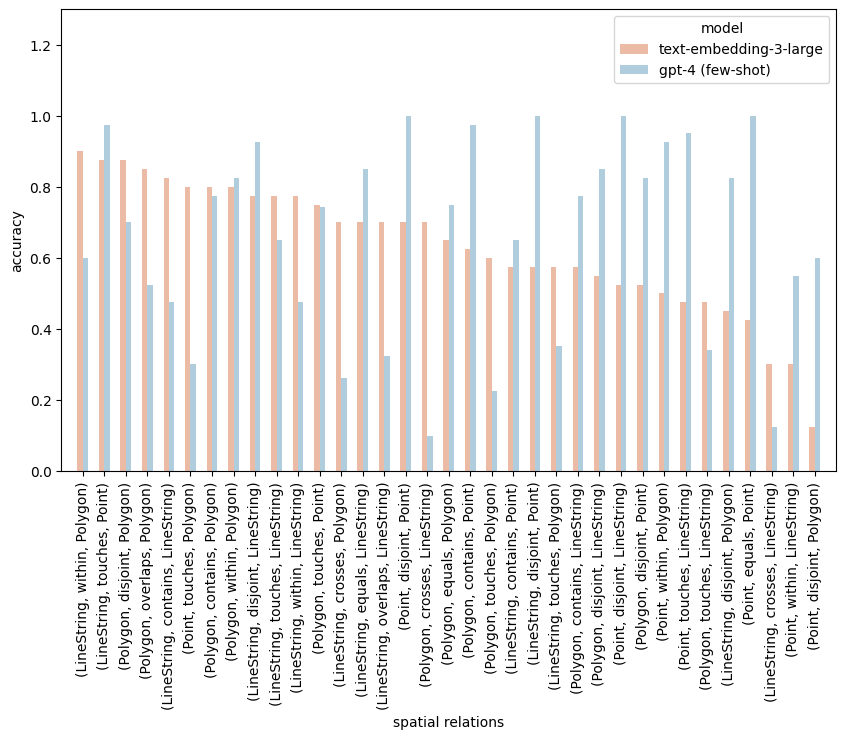

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(report, x='output', y='accuracy', hue='model', width=.5, palette = "RdBu", )
ax.set_ylim([0, 1.3])
ax.set_xlim([-1, 35])
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('spatial relations')

# plt.savefig(path+'result/task1/barplot.png', dpi=300, bbox_inches='tight')

In [ ]:

# from sklearn.metrics import classification_report, accuracy_score

res_zero = res_all[(res_all['model']=='gpt4')&(res_all['prompt_mode']=='zero_shot')]

res_zero_valid = res_zero[res_zero['pred']>-1]
# res_zero_error = res_zero_valid[res_zero_valid['predicate']!=res_zero_valid['predicate_pred']]
error_cnt = res_zero_valid[['geom_type_subject', 'geom_type', 'predicate', 'predicate_pred']]
#  .groupby(['geom_type_subject', 'geom_type', 'predicate', 'predicate_pred'])).count().reset_index().rename(columns={'subjectid': 'count'})
# cnt = error_cnt[['geom_type_subject', 'geom_type', 'predicate', 'count']].groupby(['geom_type_subject', 'geom_type', 'predicate']).sum()
# error_cnt = pd.merge(error_cnt, cnt, on=['geom_type_subject', 'geom_type', 'predicate'], how='inner')
# error_cnt['weight'] = error_cnt['count_x'] / error_cnt['count_y']
# error_cnt = error_cnt.rename(columns={'predicate': 'source', 'predicate_pred': 'target'})
error_cnt.head()

,geom_type_subject,geom_type,predicate,predicate_pred
7000,LineString,LineString,contains,touches
7001,LineString,LineString,contains,contains
7002,LineString,LineString,contains,overlaps
7003,LineString,LineString,contains,contains
7004,Polygon,LineString,contains,touches


In [ ]:

comb = error_cnt[['geom_type_subject', 'geom_type']].drop_duplicates().sort_values(by=['geom_type_subject', 'geom_type']).reset_index(drop=True)
comb

,geom_type_subject,geom_type
0,LineString,LineString
1,LineString,Point
2,LineString,Polygon
3,Point,LineString
4,Point,Point
5,Point,Polygon
6,Polygon,LineString
7,Polygon,Point
8,Polygon,Polygon


In [ ]:
comb.shape


(9, 2)

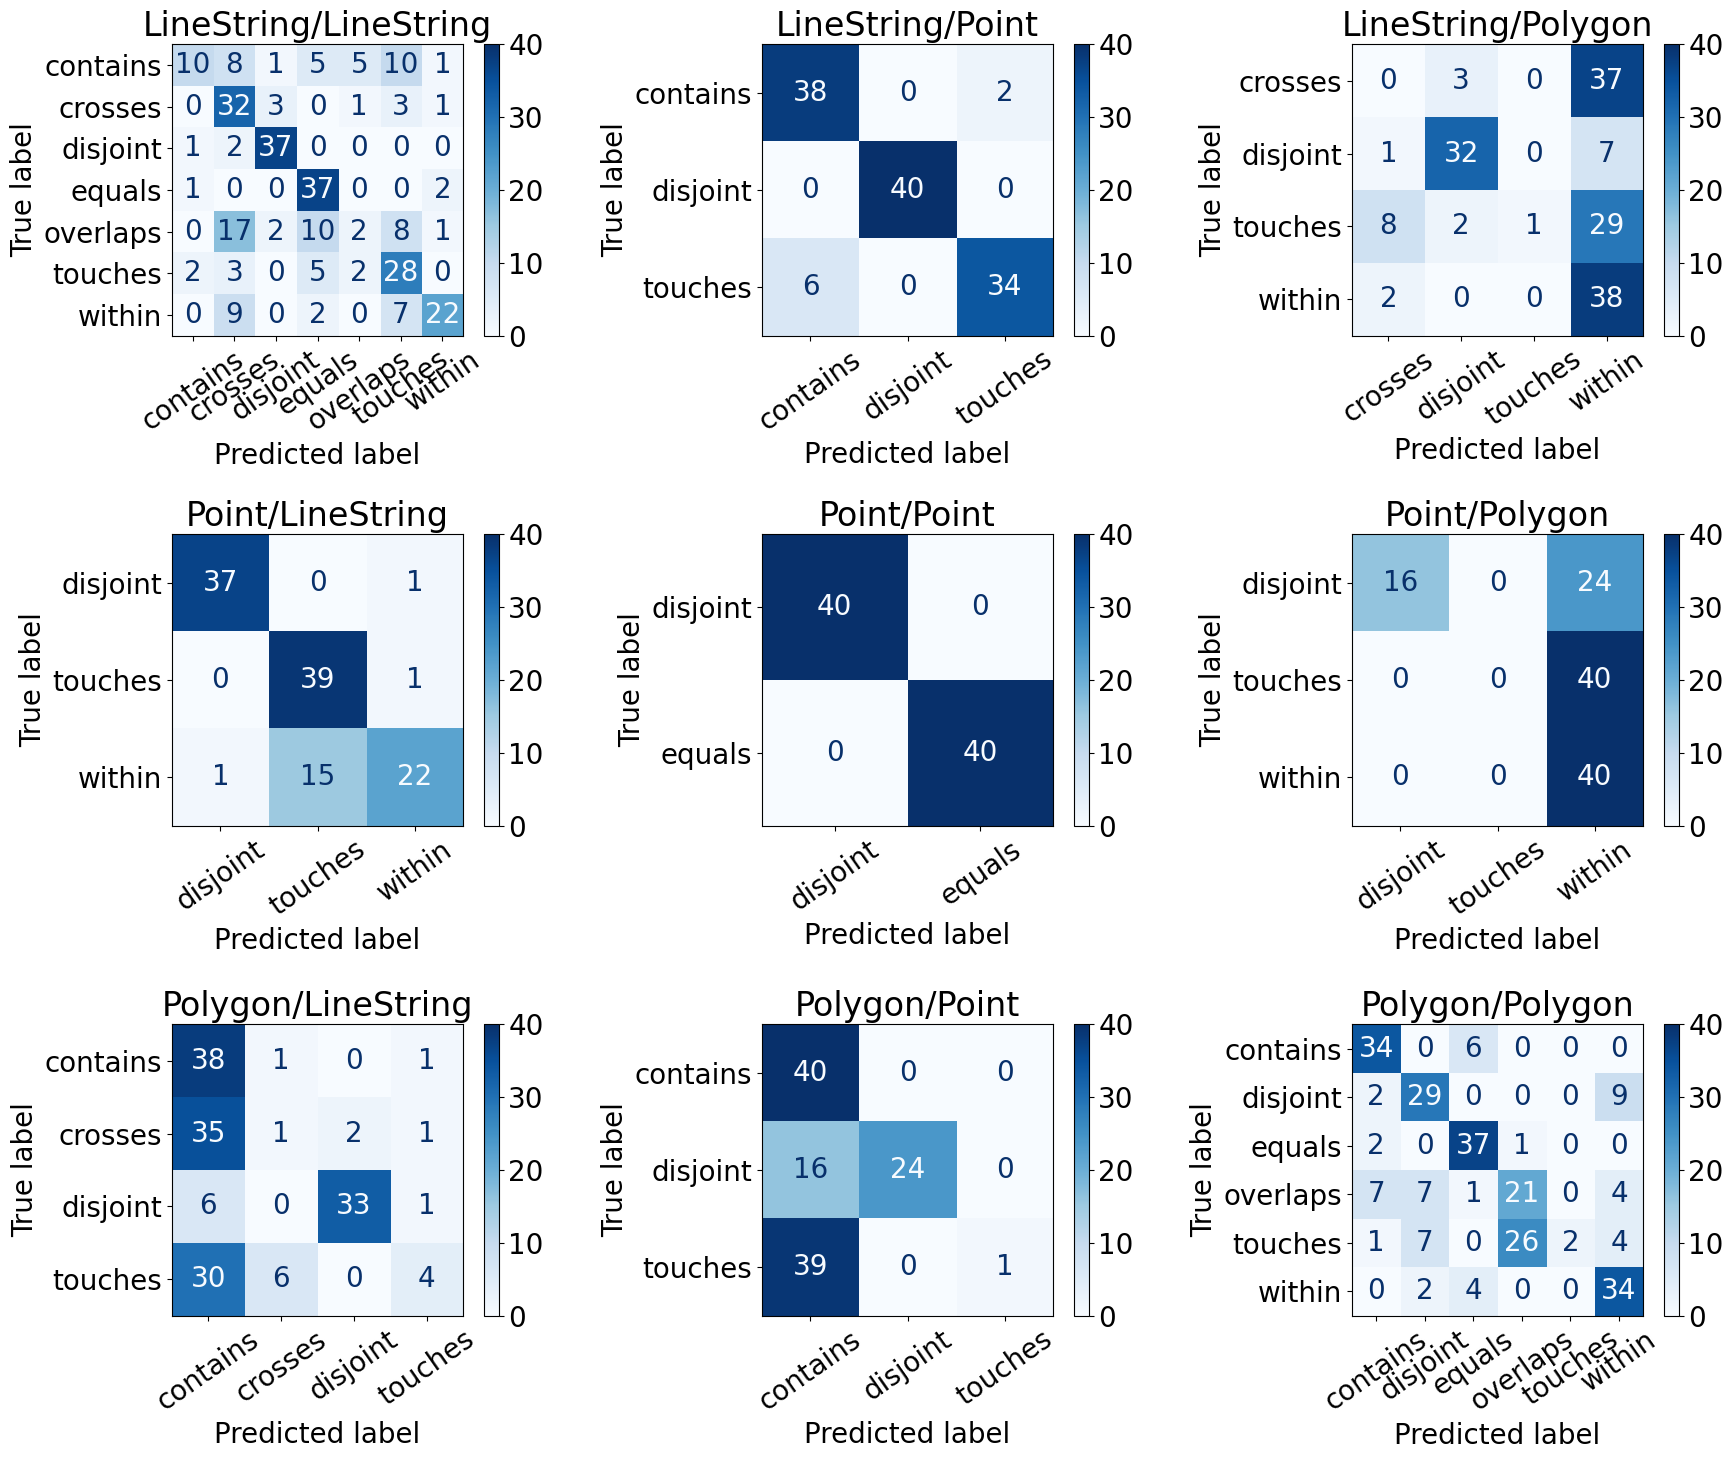

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(3, 3, figsize= (18, 15), tight_layout=True)
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 20})
for idx, row in comb.iterrows():
    xx = int(idx//3)
    yy = int(idx%3)

    error_cnt_comb = error_cnt[(error_cnt['geom_type_subject']==row['geom_type_subject'])&
                           (error_cnt['geom_type']==row['geom_type'])]
    cm = confusion_matrix(error_cnt_comb['predicate'], error_cnt_comb['predicate_pred'],
                          labels=sorted(list(set(error_cnt_comb['predicate']))))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sorted(list(set(error_cnt_comb['predicate']))),
                                 )
    disp.plot(cmap=plt.cm.Blues, ax=ax[xx][yy])
    disp.im_.set_clim(0, 40)
    ax[xx][yy].tick_params(axis='x', rotation=35)
    ax[xx][yy].set_title(row['geom_type_subject']+'/'+row['geom_type'])
    # plt.savefig(path+'result/final/V1/%s_%s.png'%(row['geom_type_subject'], row['geom_type']))

#     G = nx.from_pandas_edgelist(error_cnt_comb, edge_attr=True, create_using=nx.DiGraph())

#     for edge in G.edges().values():
#         edge["penwidth"] = round(1 + edge["weight"]**2 * 5, 2)
#         edge["arrowsize"] = .3

#     # for node in G.nodes().values():
#     #     node['fontsize'] = 18

#     p = nx.drawing.nx_pydot.to_pydot(G)
#     p.write_png(path+'result/final/V1/%s_%s.png'%(row['geom_type_subject'], row['geom_type']))
#     # ax[xx][yy].set_title(row['geom_type_subject']+'/'+row['geom_type'])

# #
# plt.savefig(path+'/result/final/V1/task1_cng_matrix_few_shot.png', dpi=300, bbox_inches='tight')

In [ ]:

# from sklearn.metrics import classification_report, accuracy_score

res_zero = res_all[(res_all['model']=='gpt4')&(res_all['prompt_mode']=='few_shot_cot')]

res_zero_valid = res_zero[res_zero['pred']>-1]
# res_zero_error = res_zero_valid[res_zero_valid['predicate']!=res_zero_valid['predicate_pred']]
error_cnt = res_zero_valid[['geom_type_subject', 'geom_type', 'predicate', 'predicate_pred']]
#  .groupby(['geom_type_subject', 'geom_type', 'predicate', 'predicate_pred'])).count().reset_index().rename(columns={'subjectid': 'count'})
# cnt = error_cnt[['geom_type_subject', 'geom_type', 'predicate', 'count']].groupby(['geom_type_subject', 'geom_type', 'predicate']).sum()
# error_cnt = pd.merge(error_cnt, cnt, on=['geom_type_subject', 'geom_type', 'predicate'], how='inner')
# error_cnt['weight'] = error_cnt['count_x'] / error_cnt['count_y']
# error_cnt = error_cnt.rename(columns={'predicate': 'source', 'predicate_pred': 'target'})
error_cnt.head()

,geom_type_subject,geom_type,predicate,predicate_pred
12600,LineString,LineString,contains,touches
12601,LineString,LineString,contains,contains
12602,LineString,LineString,contains,contains
12603,LineString,LineString,contains,contains
12604,Polygon,LineString,contains,disjoint


In [ ]:

comb = error_cnt[['geom_type_subject', 'geom_type']].drop_duplicates().sort_values(by=['geom_type_subject', 'geom_type']).reset_index(drop=True)
comb

,geom_type_subject,geom_type
0,LineString,LineString
1,LineString,Point
2,LineString,Polygon
3,Point,LineString
4,Point,Point
5,Point,Polygon
6,Polygon,LineString
7,Polygon,Point
8,Polygon,Polygon


In [ ]:
comb.shape


(9, 2)

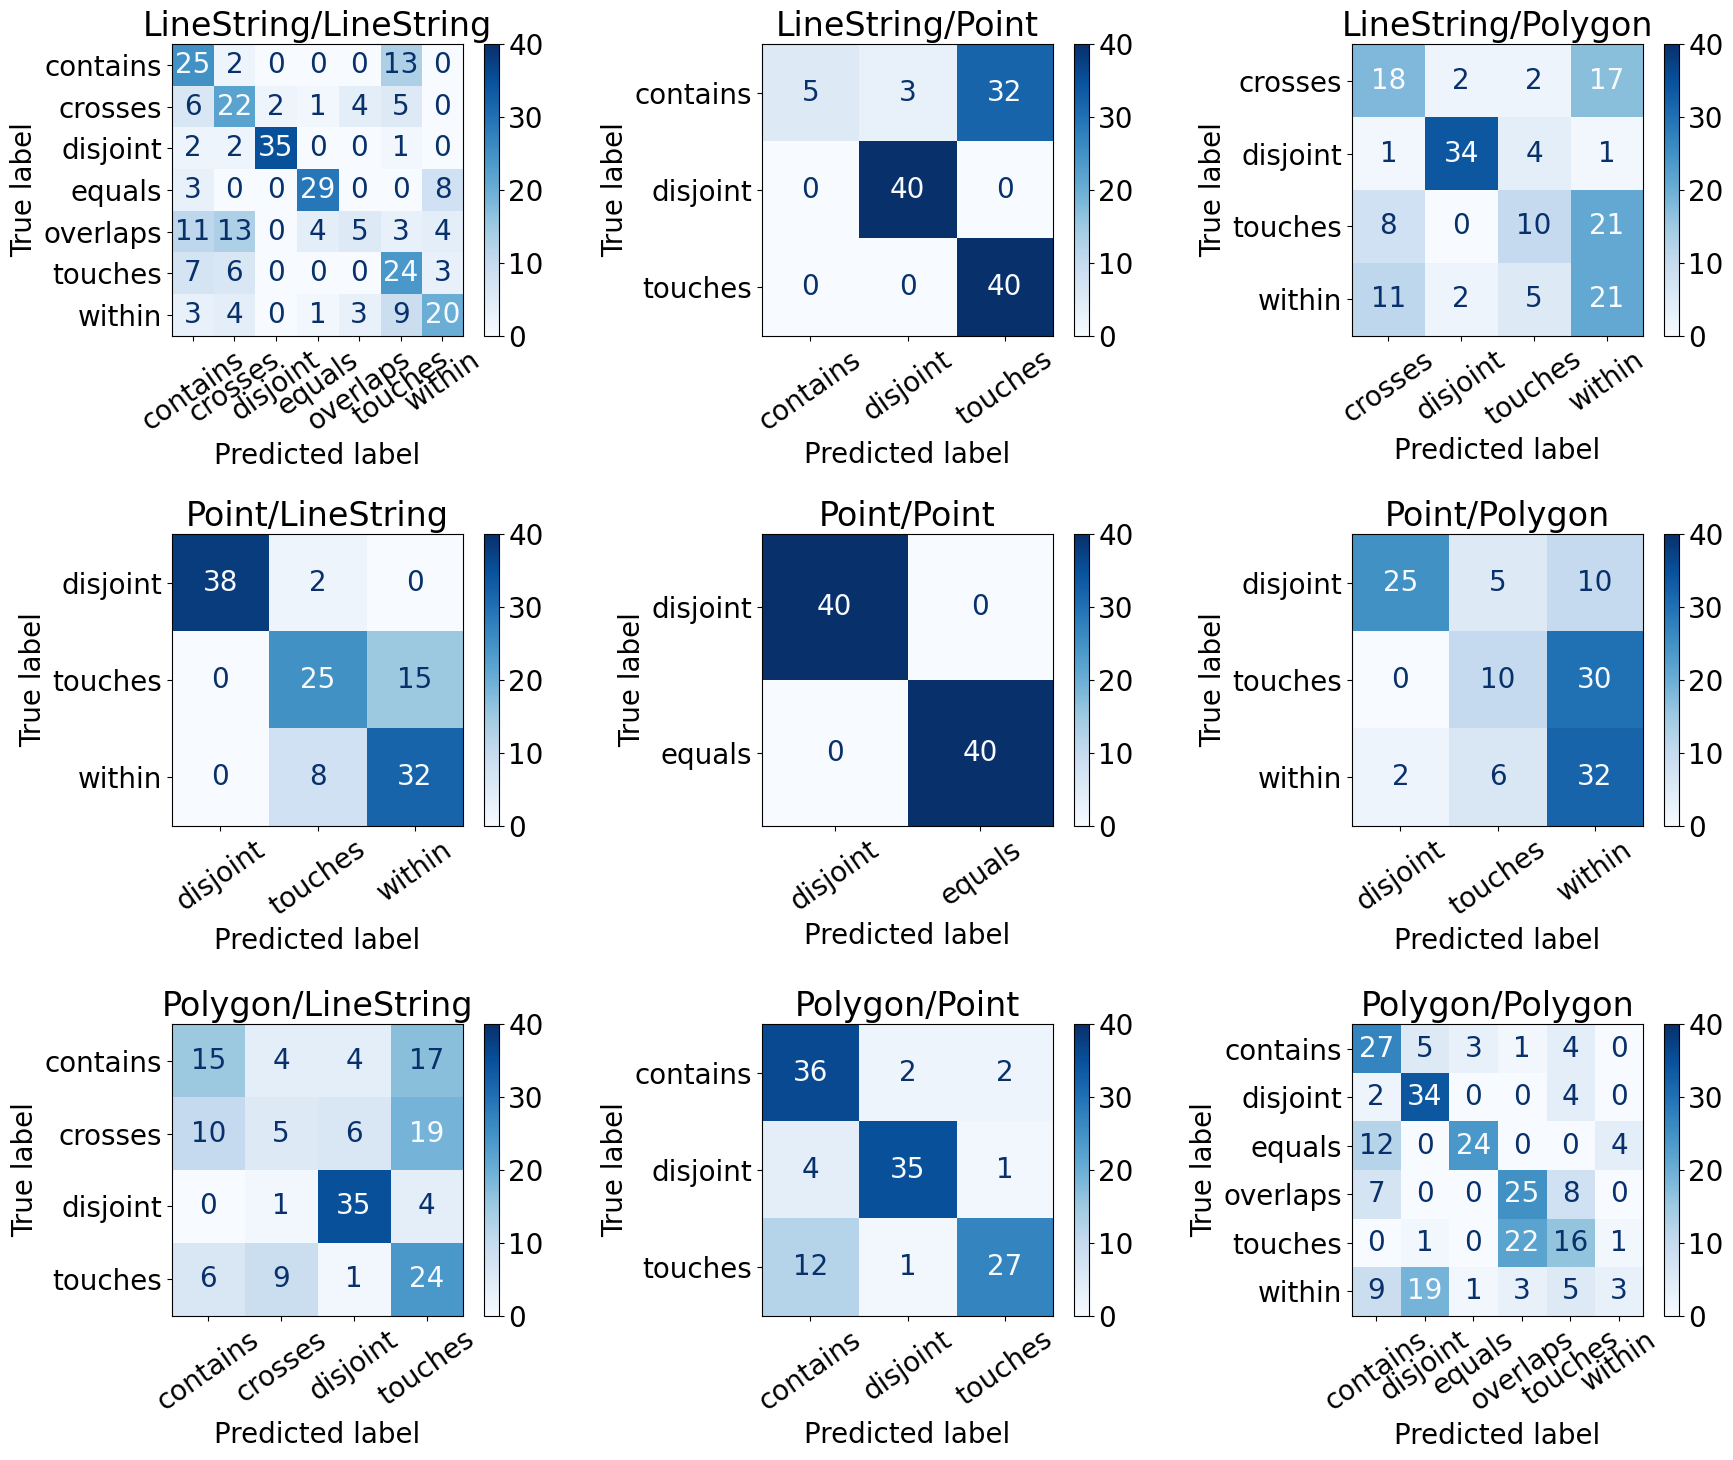

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(3, 3, figsize= (18, 15), tight_layout=True)
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 20})
for idx, row in comb.iterrows():
    xx = int(idx//3)
    yy = int(idx%3)

    error_cnt_comb = error_cnt[(error_cnt['geom_type_subject']==row['geom_type_subject'])&
                           (error_cnt['geom_type']==row['geom_type'])]
    cm = confusion_matrix(error_cnt_comb['predicate'], error_cnt_comb['predicate_pred'],
                          labels=sorted(list(set(error_cnt_comb['predicate']))))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sorted(list(set(error_cnt_comb['predicate']))),
                                 )
    disp.plot(cmap=plt.cm.Blues, ax=ax[xx][yy])
    disp.im_.set_clim(0, 40)
    ax[xx][yy].tick_params(axis='x', rotation=35)
    ax[xx][yy].set_title(row['geom_type_subject']+'/'+row['geom_type'])
    # plt.savefig(path+'result/final/V1/%s_%s.png'%(row['geom_type_subject'], row['geom_type']))

#     G = nx.from_pandas_edgelist(error_cnt_comb, edge_attr=True, create_using=nx.DiGraph())

#     for edge in G.edges().values():
#         edge["penwidth"] = round(1 + edge["weight"]**2 * 5, 2)
#         edge["arrowsize"] = .3

#     # for node in G.nodes().values():
#     #     node['fontsize'] = 18

#     p = nx.drawing.nx_pydot.to_pydot(G)
#     p.write_png(path+'result/final/V1/%s_%s.png'%(row['geom_type_subject'], row['geom_type']))
#     # ax[xx][yy].set_title(row['geom_type_subject']+'/'+row['geom_type'])

# #
# plt.savefig(path+'/result/final/V1/task1_cng_matrix_few_shot.png', dpi=300, bbox_inches='tight')